In [1]:
import ipywidgets as widgets
from ipywidgets import interact_manual
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


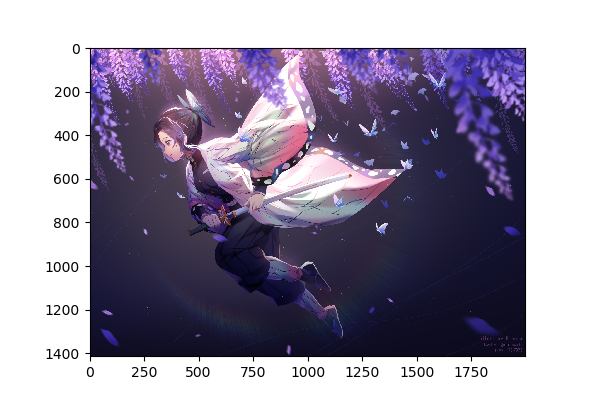

In [40]:
# plot the first image
i=1
img = plt.imread(f'{i}.png')
fig, ax = plt.subplots(1, figsize=(6, 4))
ax = plt.imshow(img)
plt.suptitle("example")
plt.show()


nxt = widgets.Button(description='Next')
prev = widgets.Button(description='Previous')
out = widgets.Output()

def next_plot(_):
    global i
    
    with out:
        i += 1

        img = plt.imread(f'{i}.png')
        plt.clf()
        plt.imshow(img)
        plt.show()

def prev_plot(_):
    global i

    with out:
        i -= 1

        img = plt.imread(f'{i}.png')
        plt.clf()
        plt.imshow(img)
        plt.show()

nxt.on_click(next_plot)
prev.on_click(prev_plot)

widgets.VBox([nxt, prev, out])

In [45]:
import os, shutil

# get the file names
files = os.listdir('data/')
len(files)

1359

<IPython.core.display.Javascript object>


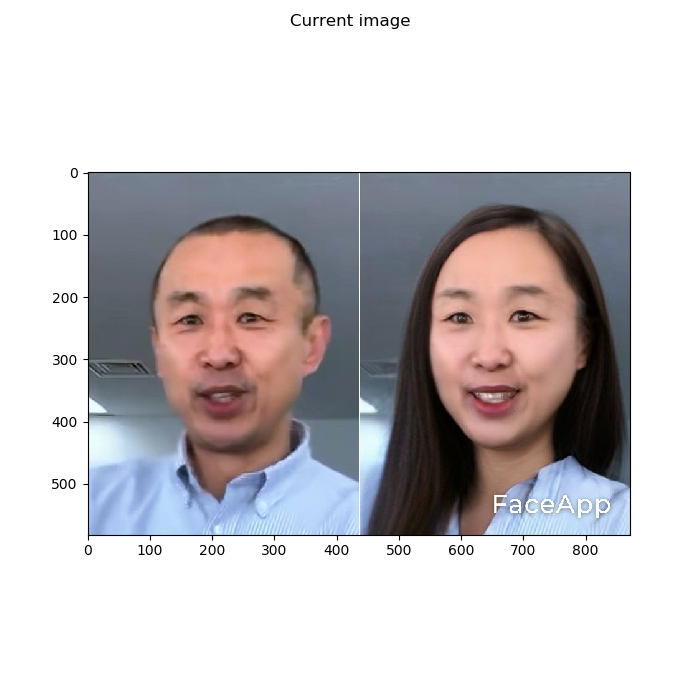

In [24]:
import os, shutil

# get the file names
files = os.listdir('data/')
len(files)

# plot the first image
i=0 # starting index
i_max = len(files) # ending index

# Plot the first picture
img = plt.imread(f'data/{files[i]}')
fig, ax = plt.subplots(1, figsize=(7, 7))
ax = plt.imshow(img)
plt.suptitle("Current image")
plt.show()


original = widgets.Button(description='Original')
fake = widgets.Button(description='Fake')
delete = widgets.Button(description='Delete')
later = widgets.Button(description='Later')
skip = widgets.Button(description='skip')
out = widgets.Output()


def plot_next(*args):
    global i
    i += 1
    # stop
    if i >= i_max: 
        print("Done")
        return
    
    # get next image index
    img = plt.imread(f'data/{files[i]}')
    ax.set_data(img)
    plt.show()
    plt.title(f"image: {files[i]}")

    
def move_image(destination):
    shutil.copy2(f'data/{files[i]}', os.path.join(destination, files[i]))
    
def original_onclick(_):
    with out:
        # copy the image to original folder
        move_image("original")
        
        # plot the next image
        plot_next()

def fake_onclick(_):
    with out:
        # copy the image to the fake folder
        move_image("fake")
        
        # plot the next image
        plot_next()
        

def delete_onclick(_):
    with out:
        # delete the image
        os.remove(f"data/{files[i]}")
        
        # plot the next image
        plot_next()
        
def later_onclick(_):
    with out:
        # copy the image to the later folder
        move_image("later")
    
        # plot the next image
        plot_next()
        
original.on_click(original_onclick)
fake.on_click(fake_onclick)
delete.on_click(delete_onclick)
later.on_click(later_onclick)
skip.on_click(plot_next)


widgets.VBox([original, fake, delete, later, skip, out])